In [4]:
import scvelo as scv
import scanpy as sc

In [31]:
adata = scv.read("/home/chang2/aneu.h5ad")

In [32]:
adata

AnnData object with n_obs × n_vars = 19855 × 30005
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'cxds_score', 'bcds_score', 'hybrid_score', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'percent.mt', 'Condition', 'Sample', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.1', 'Scissor', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'clusters', 'gwas_UCell', 'background_UCell', 'SCT_snn_res.0.8', 'SCT_snn_res.1', 'SCT_snn_res.1.2', 'SCT_snn_res.1.4', 'SCT_snn_res.1.3', 'SCT_snn_res.1.1', 'sample', 'group'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced'

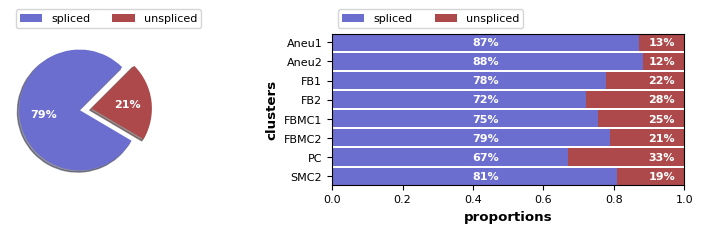

In [33]:
scv.pl.proportions(adata, groupby='clusters')

In [34]:
#scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, enforce=True)
scv.pp.filter_genes(adata)
sc.pp.normalize_total(adata, target_sum=1e4)#,layers_normalize={'X', 'spliced', 'unspliced'})
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
#scv.pp.pca(adata, n_comps=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=20)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:20) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [35]:
#scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
#scv.pp.moments(adata, n_pcs=30, n_neighbors=20)

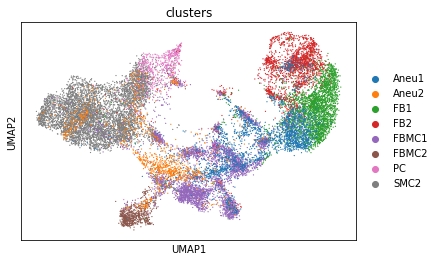

In [93]:
sc.tl.umap(adata, min_dist=.15, spread = .3)
sc.pl.umap(adata, color=['clusters'])#, size=100)

In [94]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/128 cores)


  0%|          | 0/220 [00:00<?, ?gene/s]

    finished (0:01:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:05) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


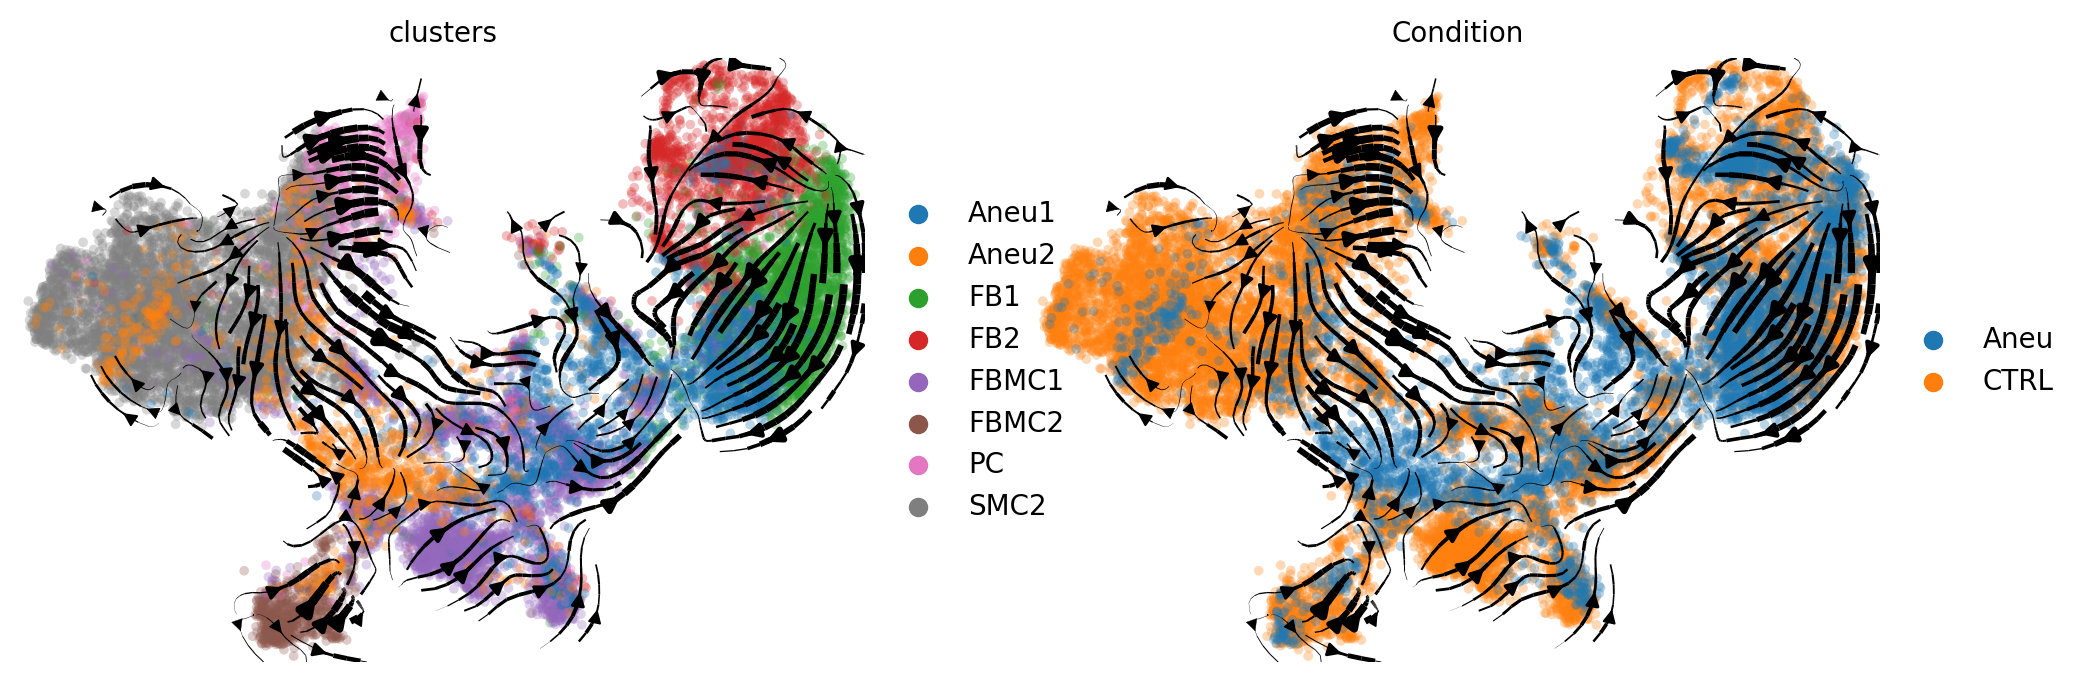

In [95]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=200, 
                                 linewidth=2, color=['clusters', "Condition"])#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

In [91]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:50]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters')

testing for differential kinetics
... 26%

KeyboardInterrupt: 

In [ ]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


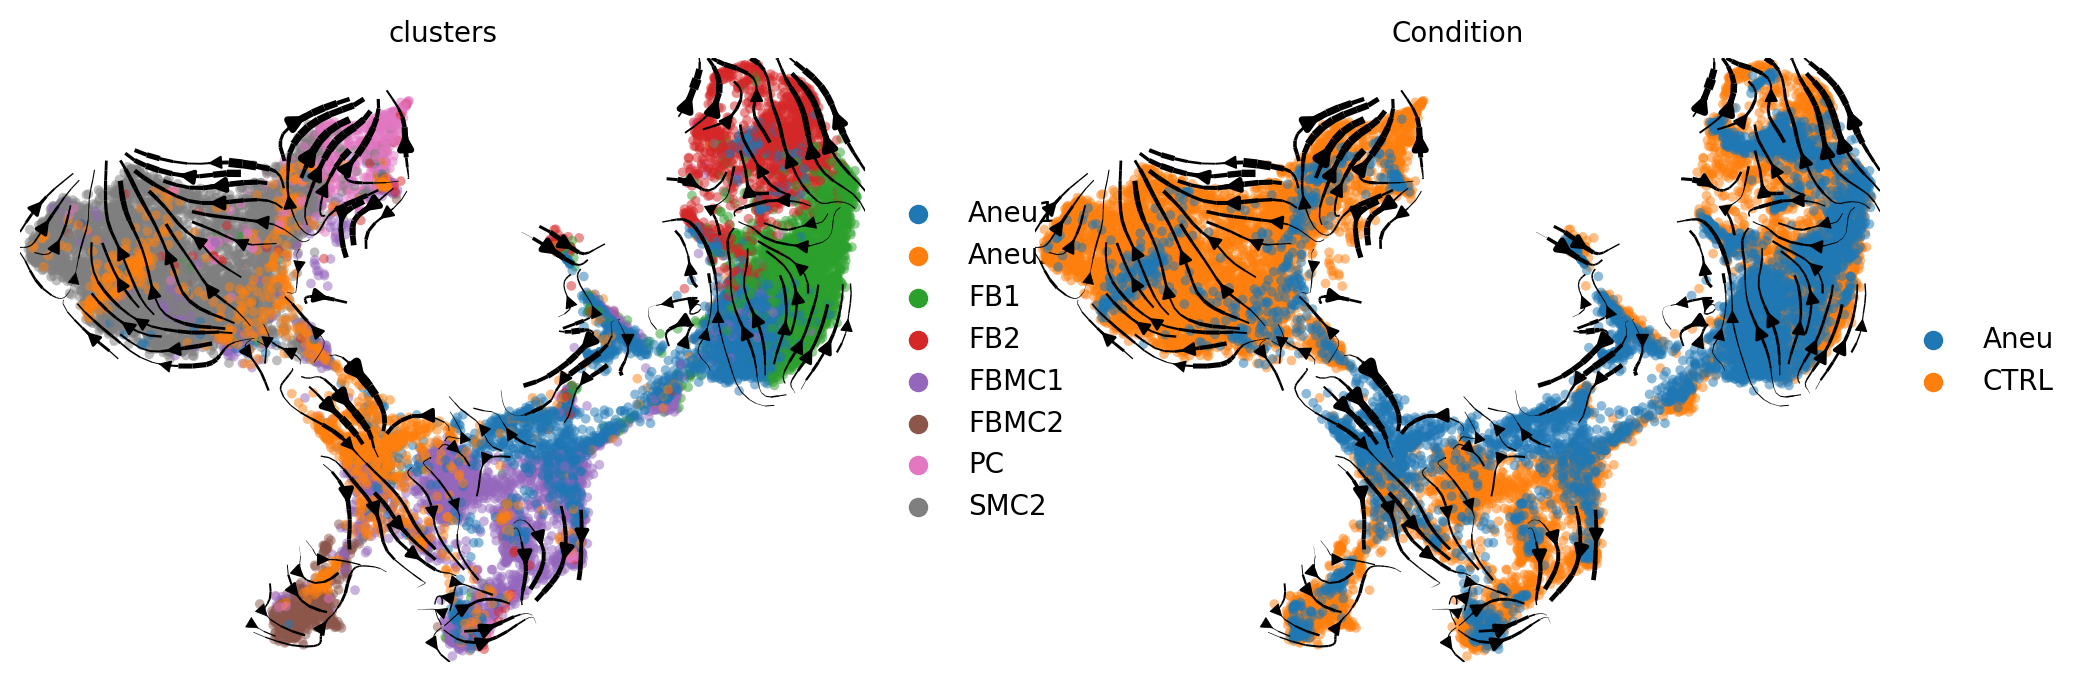

In [69]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=200, 
                                 linewidth=2, alpha=.5, color=['clusters','Condition'])#, save='avm_ec_velo.svg')

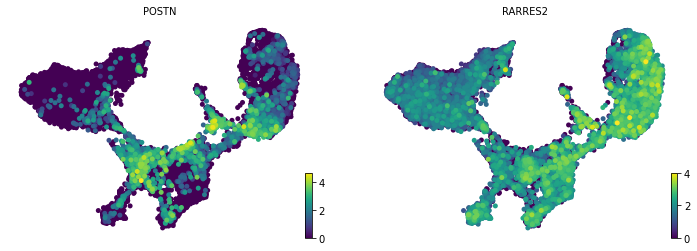

In [66]:
scv.pl.umap(adata, color=["POSTN","RARRES2"],size=100)

computing terminal states
    identified 7 regions of root cells and 1 region of end points .
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:49) --> added 
    'latent_time', shared time (adata.obs)


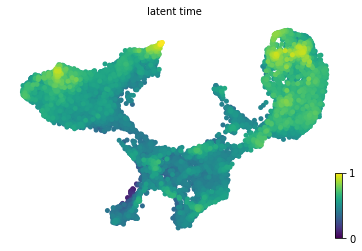

In [74]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=100, cmap='viridis')#, save='latent_time.svg')

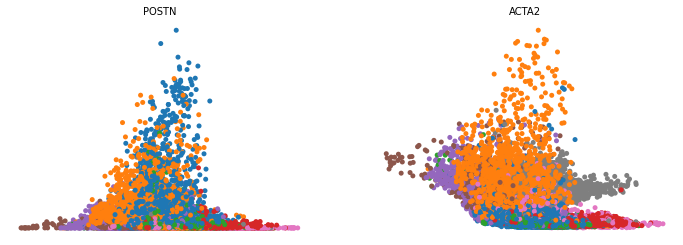

In [77]:
scv.pl.scatter(adata,x='latent_time', y=['POSTN',"ACTA2"],color ="clusters",
               use_raw =False,frameon=False, size=100)#, save='avm_ec_pseudo.svg')

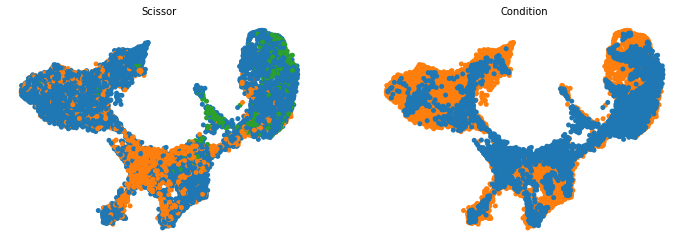

In [80]:
scv.pl.umap(adata, color=["Scissor","Condition"],size=100)

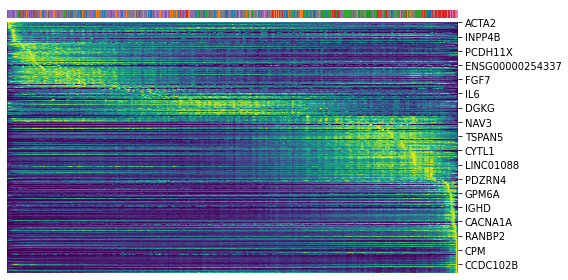

In [76]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)